# Optimize c_s

This notebook will test the accuracy as a function c_s. The paper calls for c_s to be 0.67, but in my experience, that value is too high.

In [1]:
from test import accuracy
import numpy as np
import csv
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def accuracy_vs_cs():
    c_s_values = []
    abs_accuracy_values = []
    rel_accuracy_values = []

    with open("../data/test/areas.csv", "r") as f:
        ground_truths = list(csv.DictReader(f))

    for c_s in np.linspace(0.2, 0.7, 15, endpoint=True):
        print(f"Processing c_s = {c_s}")
        c_s_values.append(c_s)
        alg_output = accuracy.algorithm_output(c_s)
        alg_output_sum, ground_truth_sum, abs_diff, sum_time, table_rows = accuracy.summary_stats(alg_output, ground_truths, "amira")
        abs_accuracy_values.append(abs_diff)
        rel_accuracy_values.append(alg_output_sum - ground_truth_sum)

    return c_s_values, abs_accuracy_values, rel_accuracy_values

In [3]:
cs_values, abs_accuracy, rel_accuracy = accuracy_vs_cs()

Processing c_s = 0.2
Processing c_s = 0.2357142857142857
Processing c_s = 0.27142857142857146
Processing c_s = 0.30714285714285716
Processing c_s = 0.34285714285714286
Processing c_s = 0.37857142857142856
Processing c_s = 0.41428571428571426
Processing c_s = 0.45
Processing c_s = 0.4857142857142857
Processing c_s = 0.5214285714285714
Processing c_s = 0.5571428571428572
Processing c_s = 0.5928571428571429
Processing c_s = 0.6285714285714286
Processing c_s = 0.6642857142857143
Processing c_s = 0.7


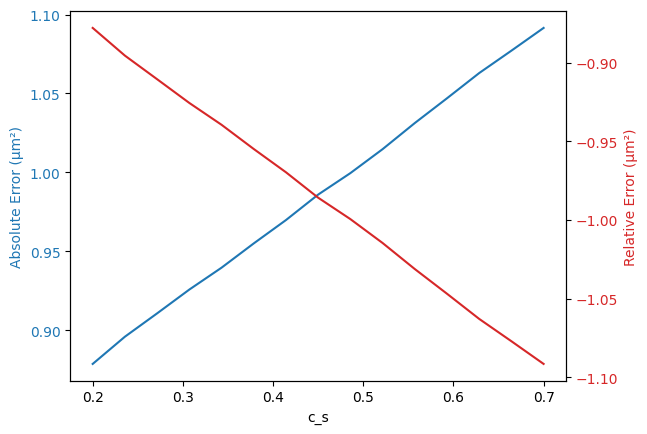

In [4]:
# Plot absolute and relative error as a function of c_s

fig, ax1 = plt.subplots()

ax1.set_xlabel("c_s")
ax1.set_ylabel("Absolute Error (μm²)", color="tab:blue")
ax1.plot(cs_values, abs_accuracy, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Relative Error (μm²)", color="tab:red")
ax2.plot(cs_values, rel_accuracy, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")